In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.rcParams['font.sans-serif'] = ['SimSun']  # 使用宋体或其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

In [4]:

# Load the CSV file
file_path = r"C:\Users\Runker\Desktop\feature_table_result.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)
df.head()

,亚类,土属,土种,土类,TWI5,TPI201,TPI101,TPI11,TPI3,TMP,...,PLCUR,POCUR,LON,LAT,PH,DL,SC2,OSJL,SOM,DZ
0,酸性紫色土,黏质酸性紫色土,低黏质酸性紫色土,紫色土,8.513925,20.920898,-20.338257,-4.790527,-0.400513,138.66667,...,-3.452797,-7.452796,400810.0,3135375.0,6.079611,2.0,3,247.487380,27.312786,1
1,中性紫色土,黏质中性紫色土,中黏质中性紫色土,紫色土,6.150497,-70.393555,-31.960815,-1.263062,-0.061768,138.66667,...,-1.600421,2.400555,401090.0,3135560.0,6.430519,2.0,2,5.000000,27.487282,1
2,中性紫色土,壤质中性紫色土,高壤质中性紫色土,紫色土,3.867191,-51.974365,-19.442627,2.042603,0.261963,143.83333,...,0.458692,-9.541796,399630.0,3131535.0,6.114065,2.0,2,74.330345,35.349170,1
3,酸性紫色土,壤质酸性紫色土,中壤质酸性紫色土,紫色土,3.831816,-47.574097,-9.847290,0.463257,0.014404,136.91667,...,-0.462183,2.338109,399605.0,3131265.0,5.528338,2.0,2,32.015620,32.940200,1
4,酸性紫色土,黏质酸性紫色土,低黏质酸性紫色土,紫色土,7.125938,-45.481323,-9.782227,0.113464,0.001221,147.75000,...,-0.879808,0.320631,401635.0,3131520.0,6.074504,2.0,2,81.394104,29.642498,1


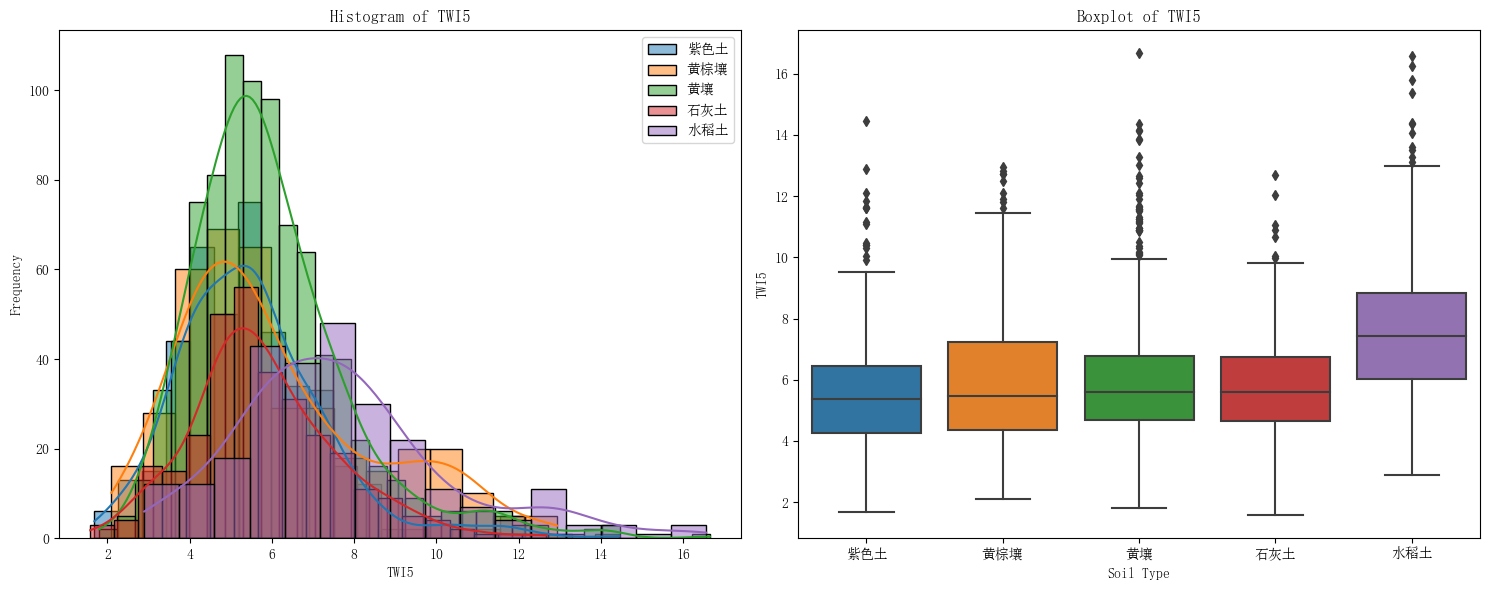

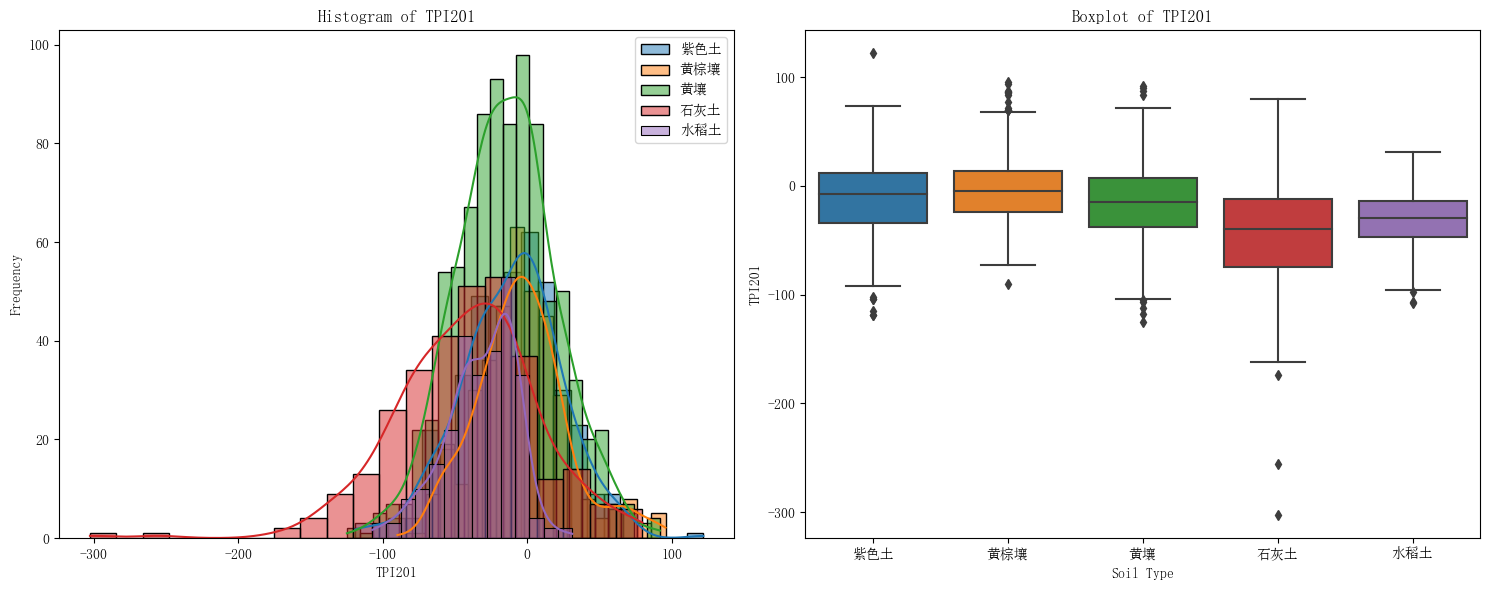

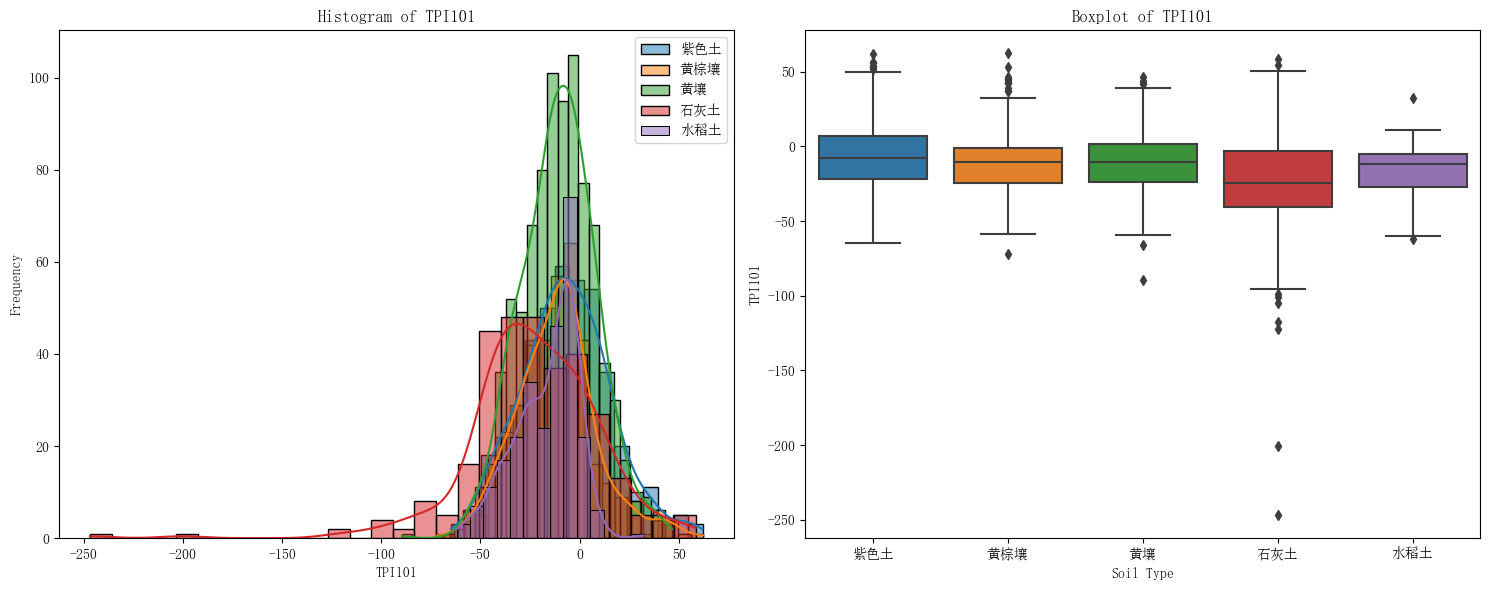

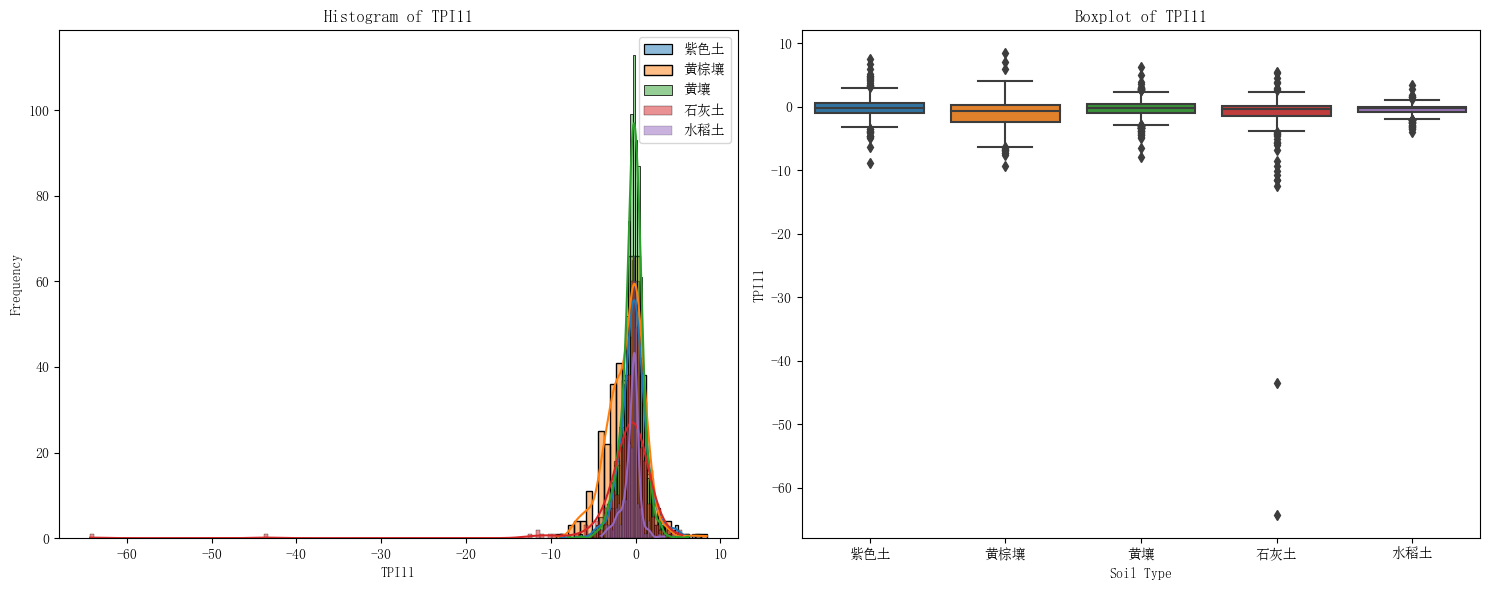

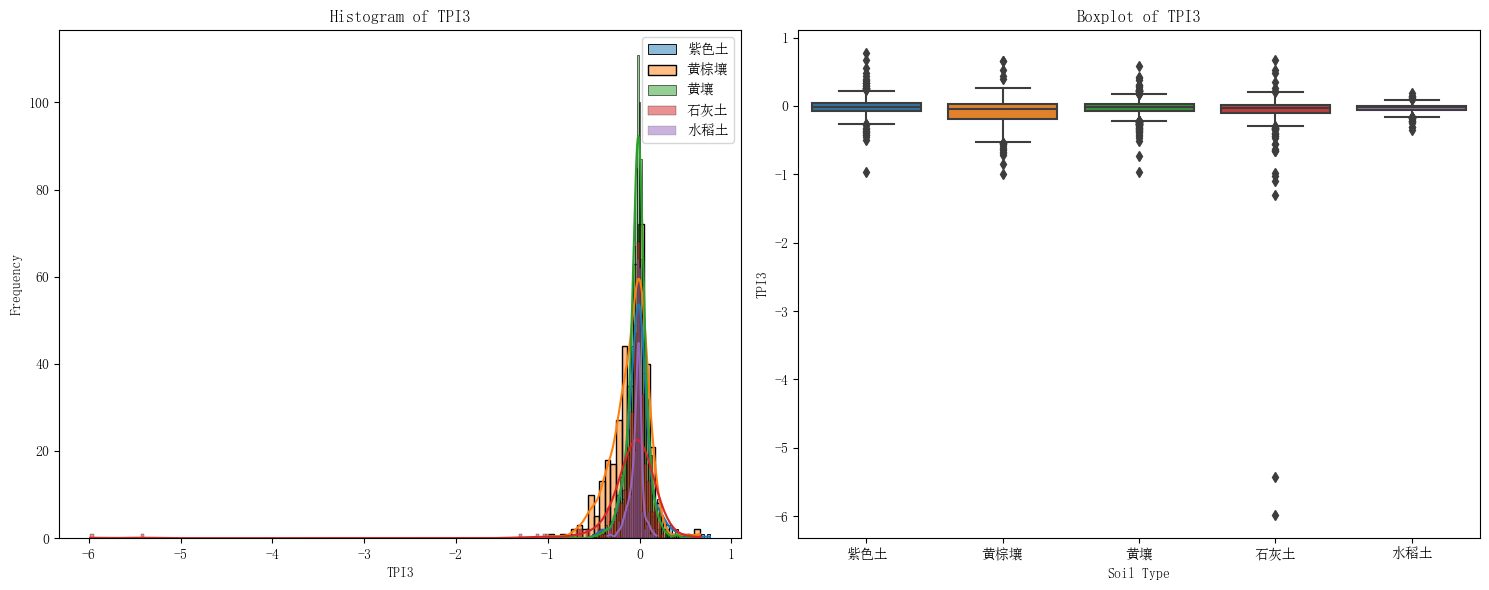

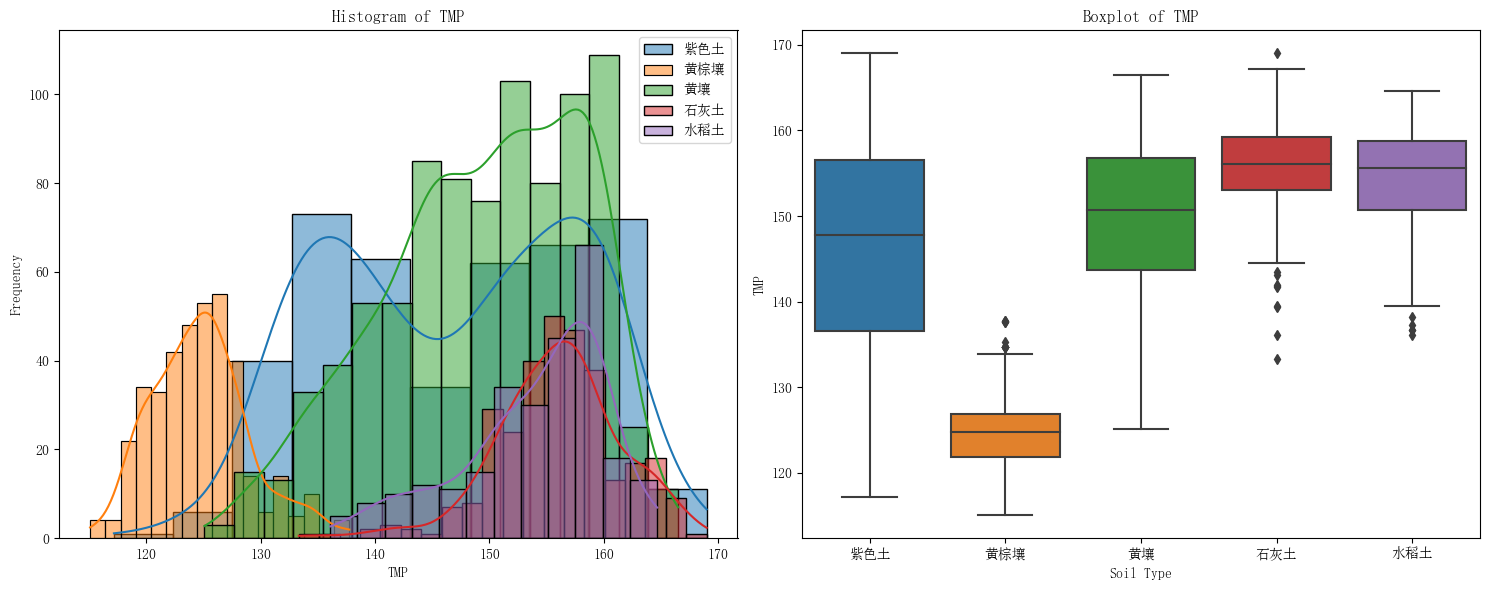

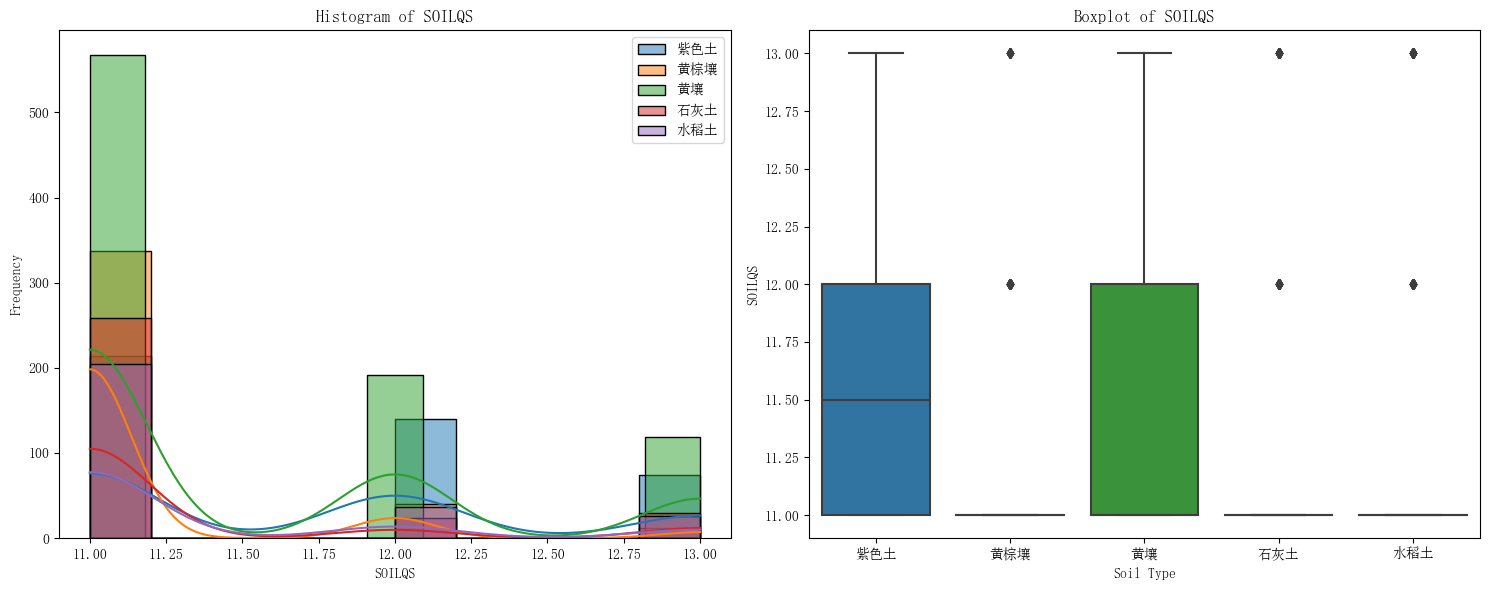

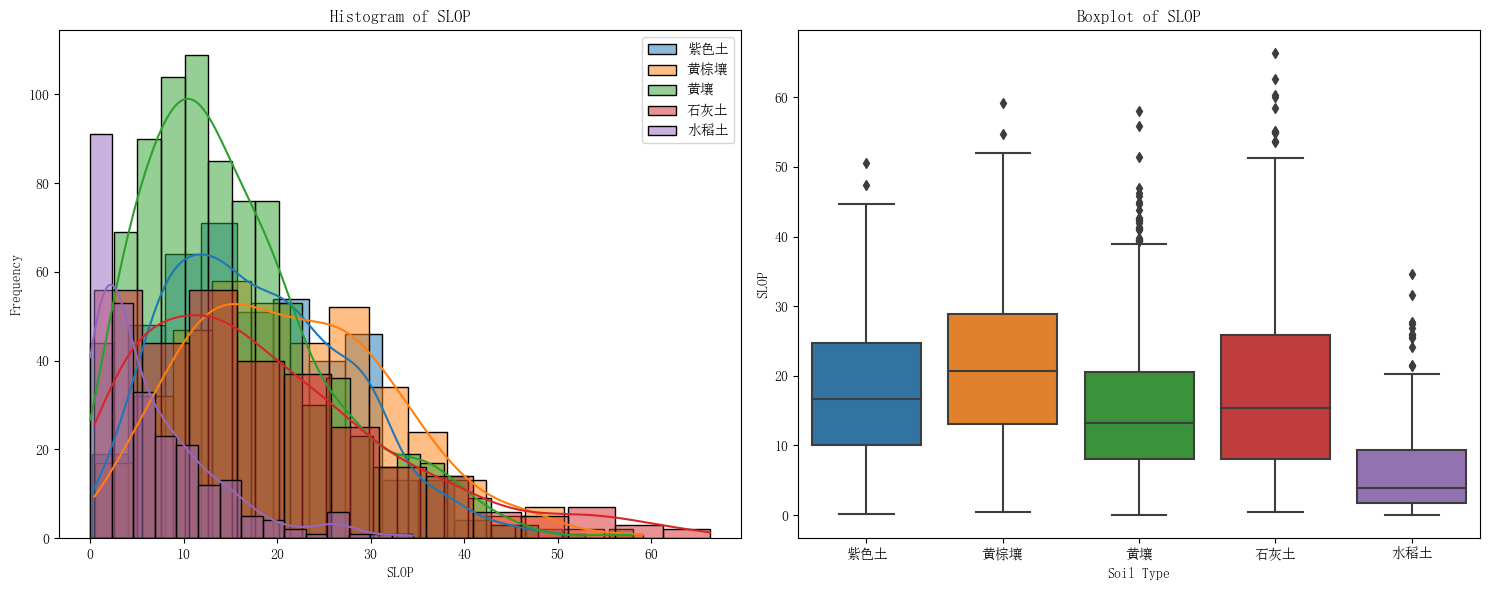

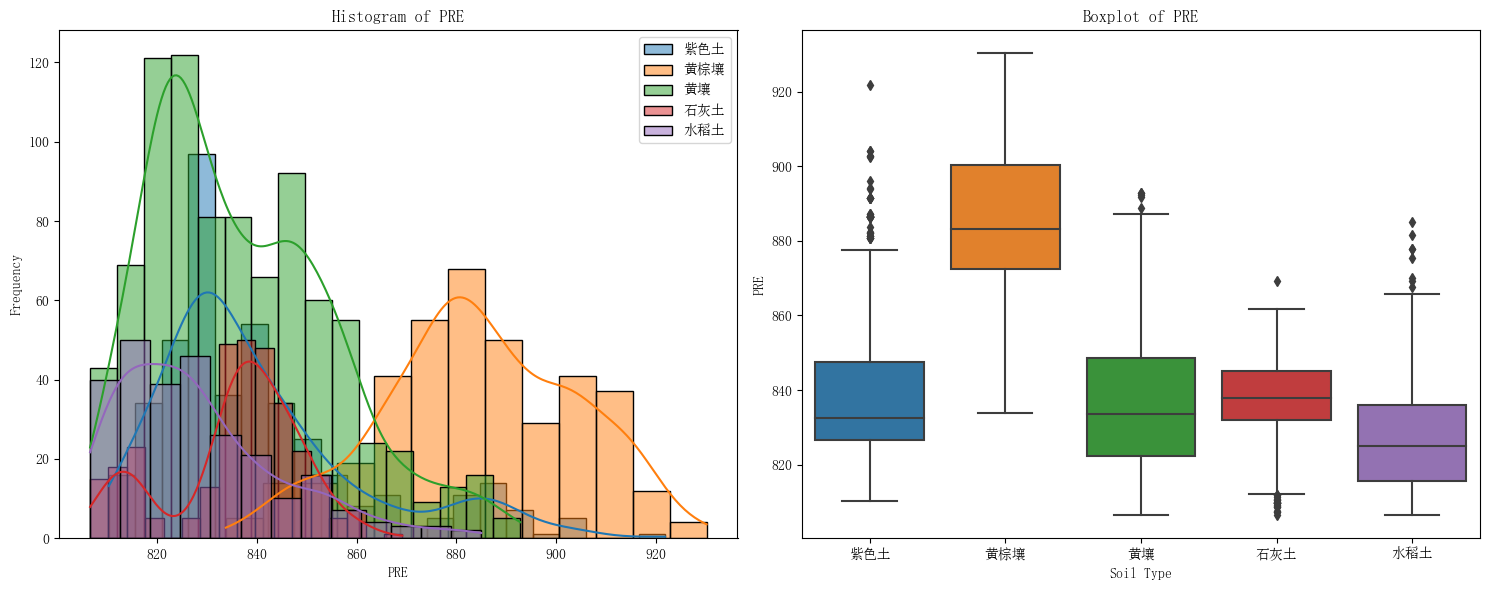

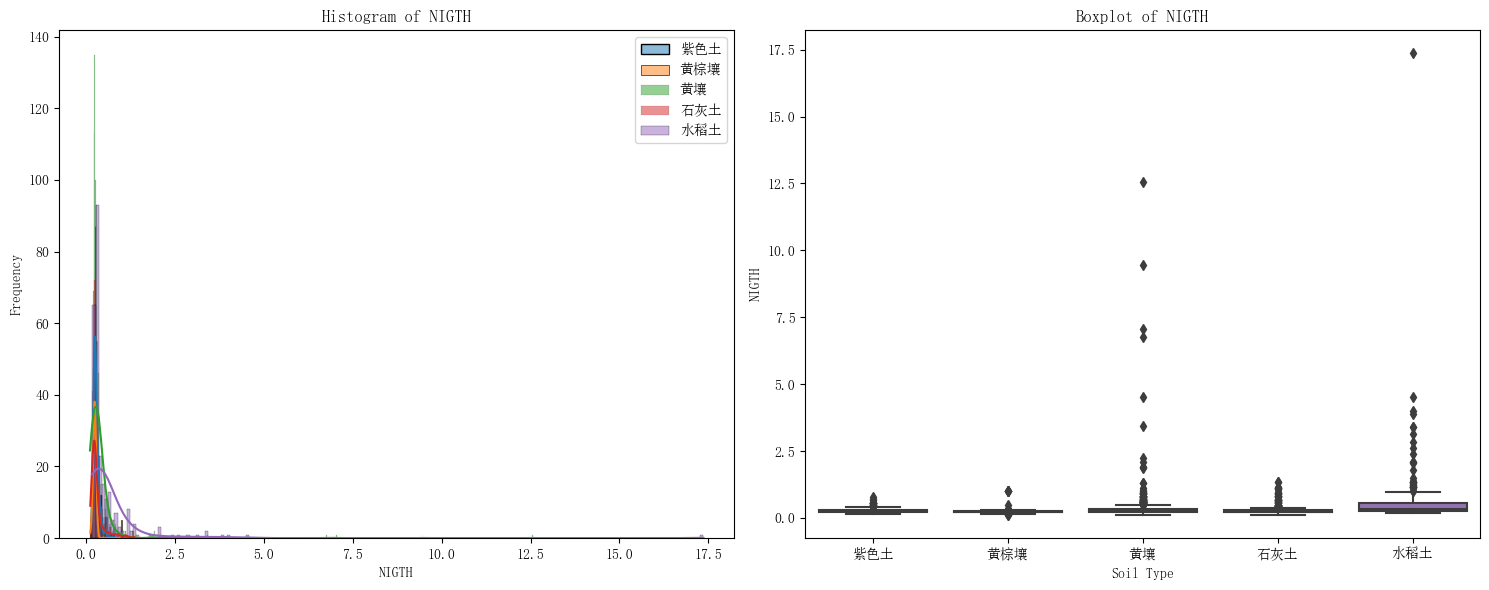

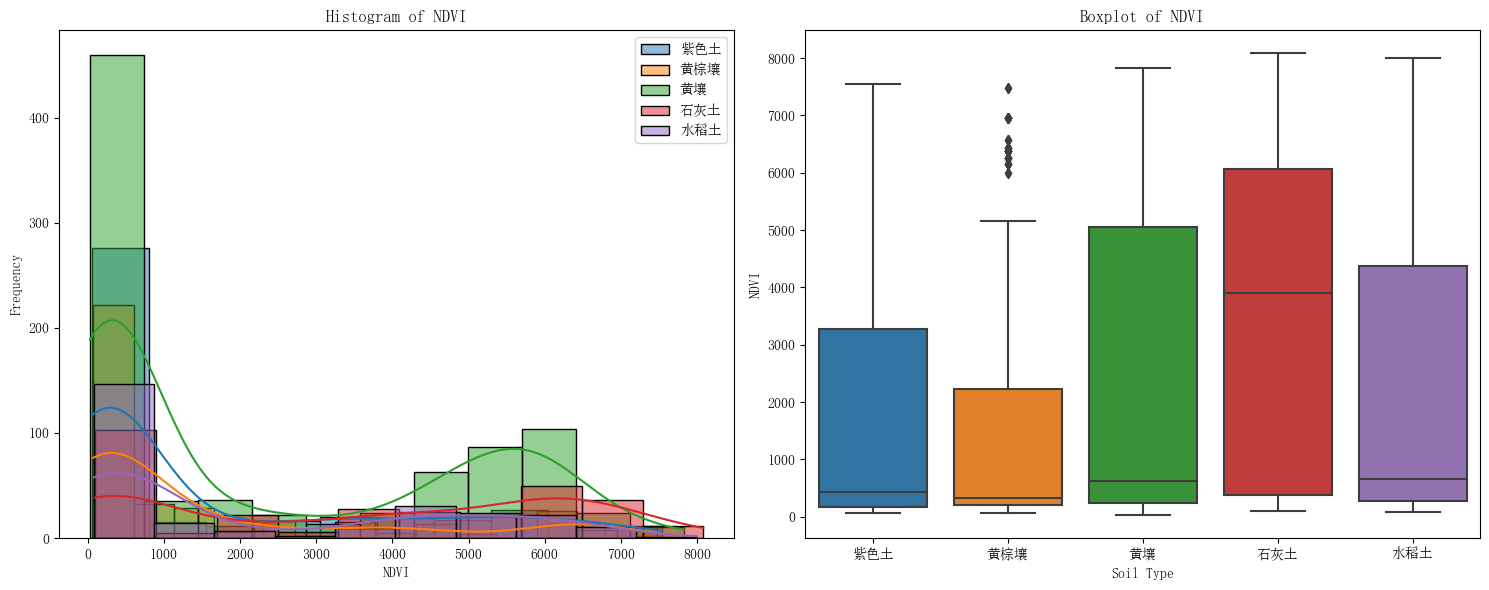

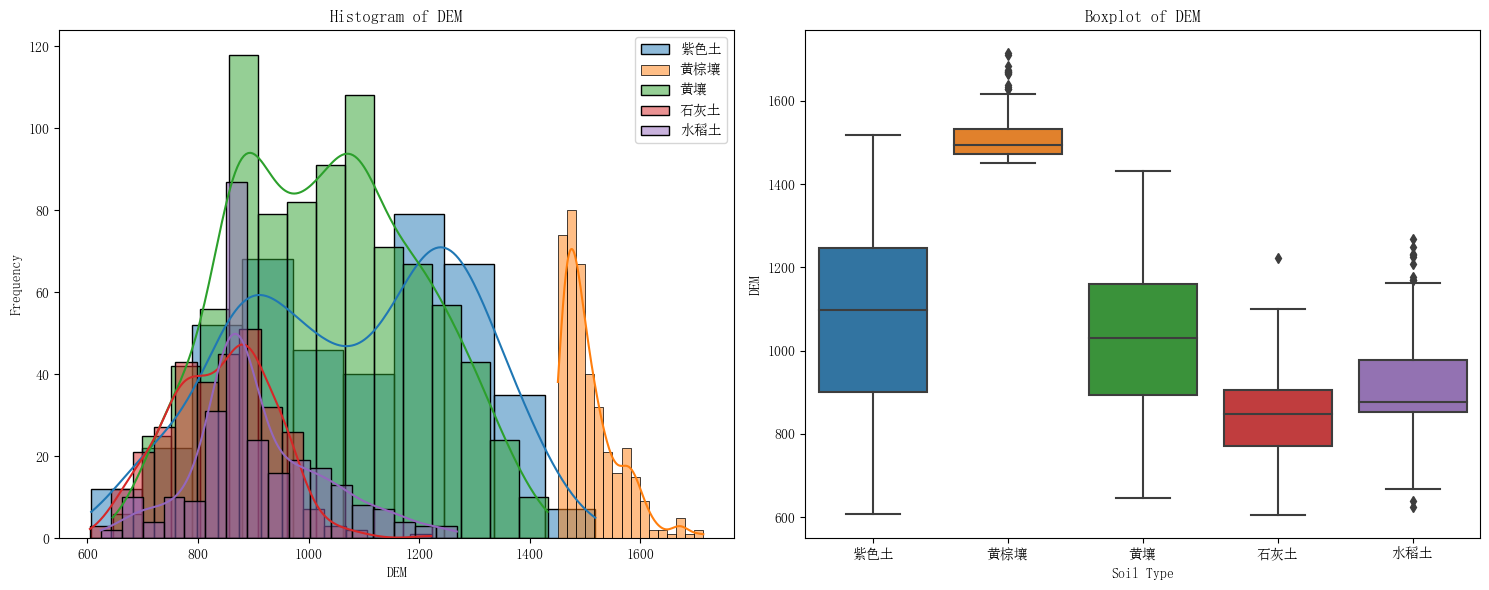

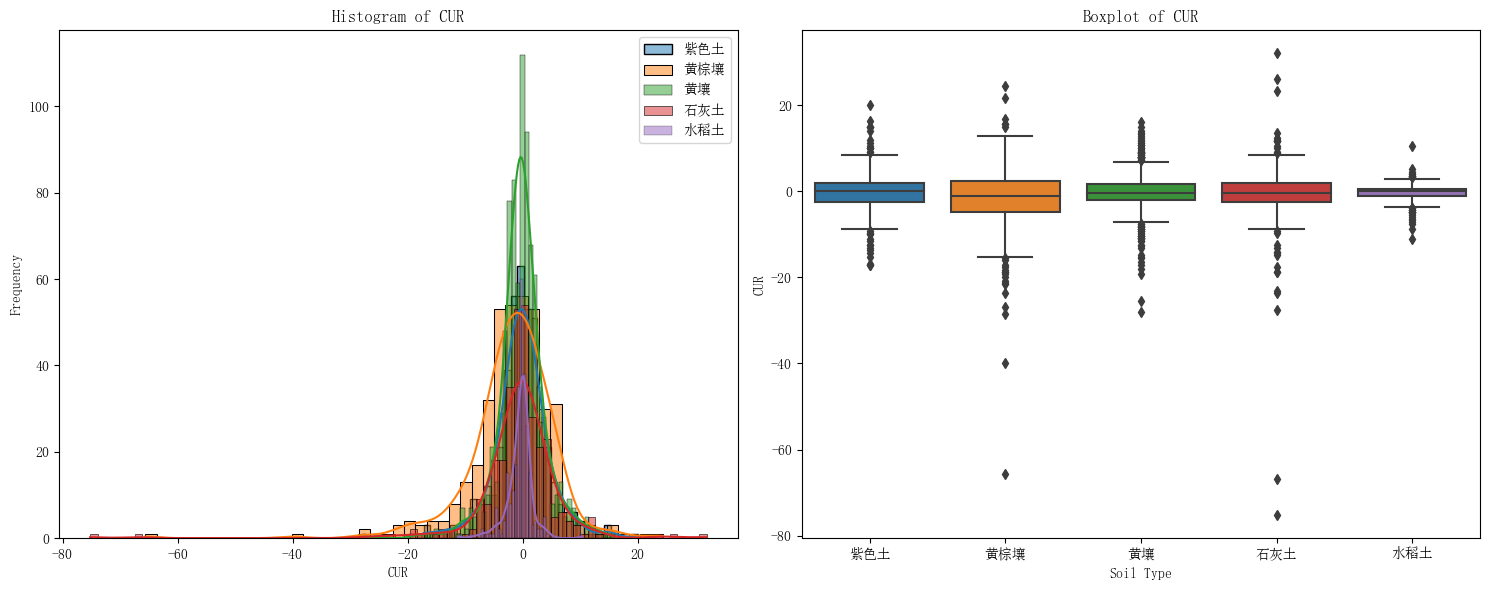

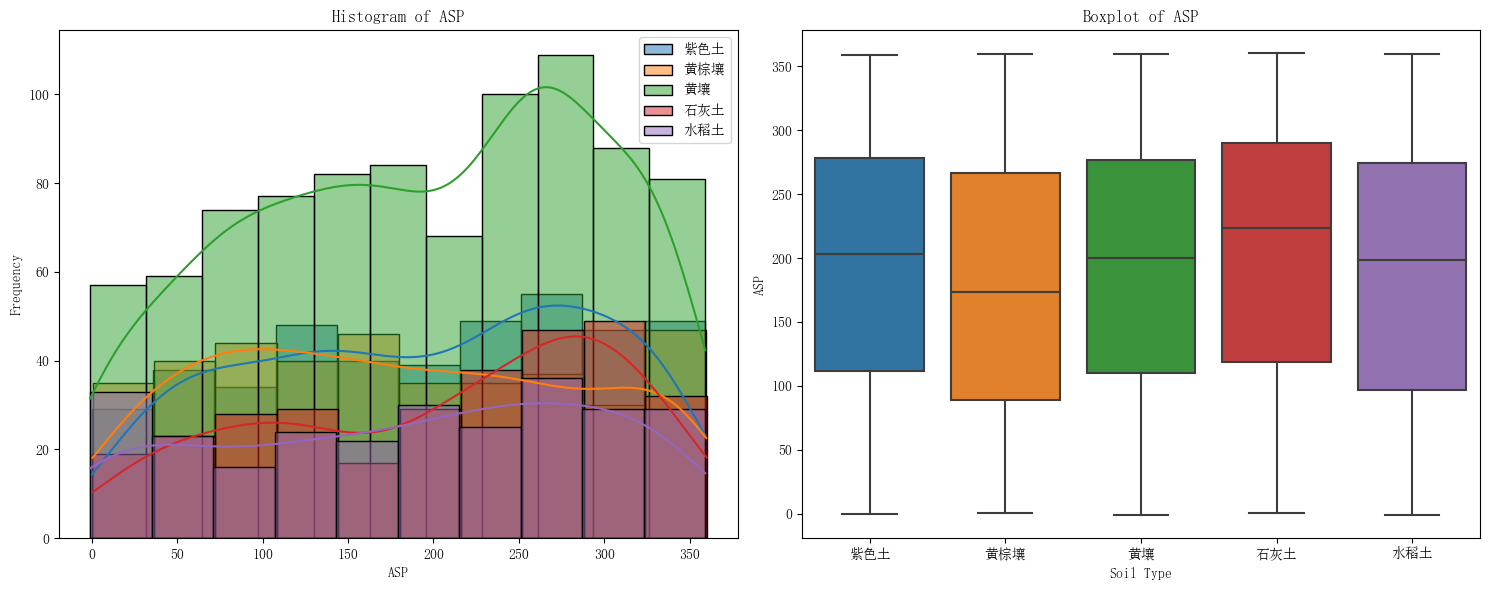

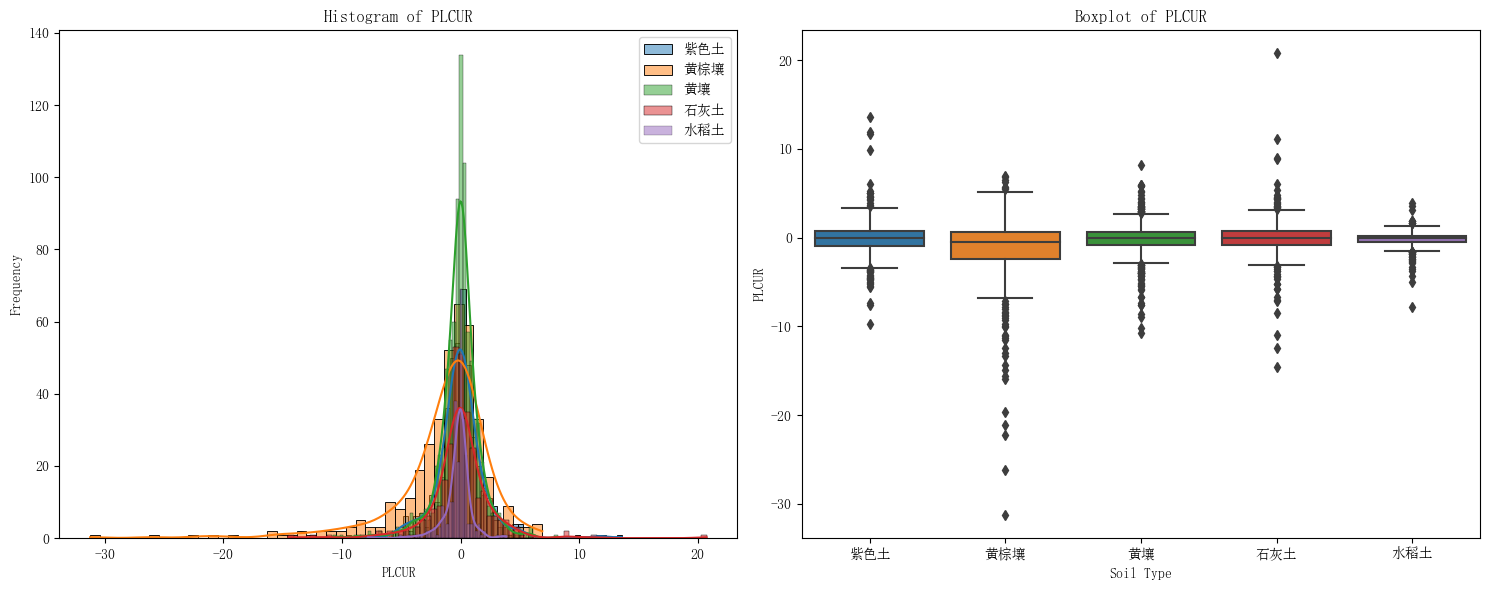

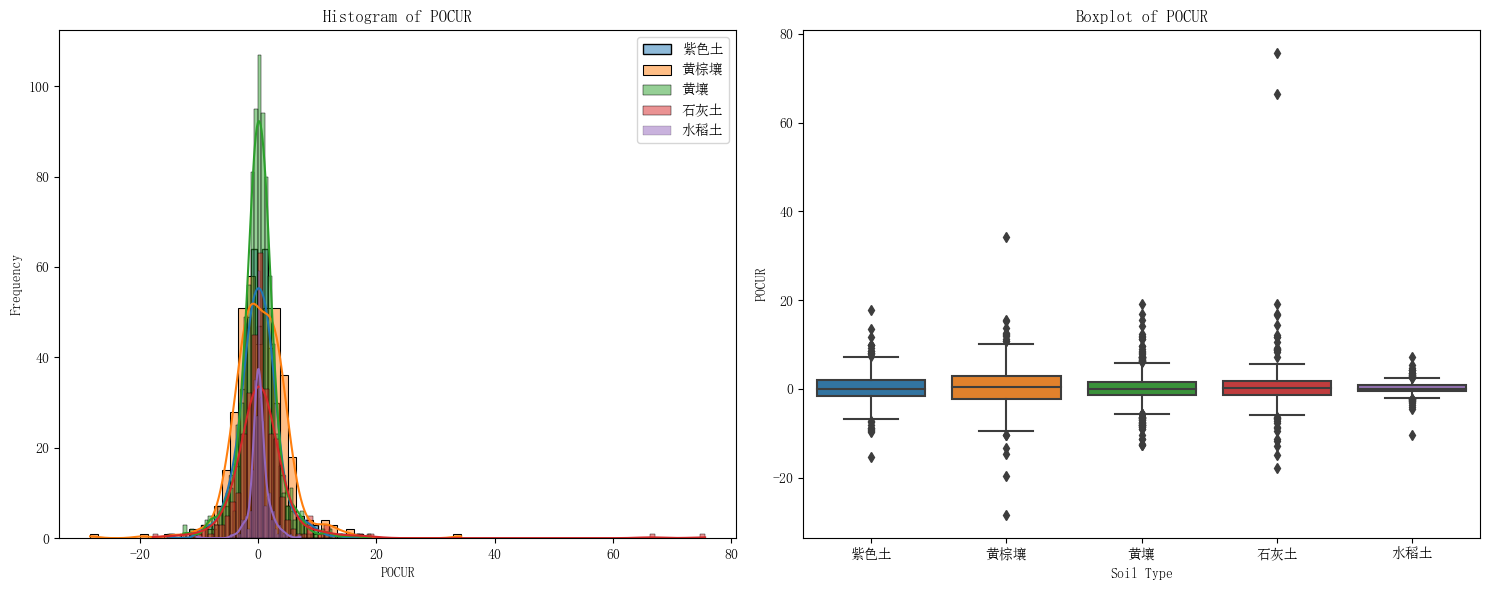

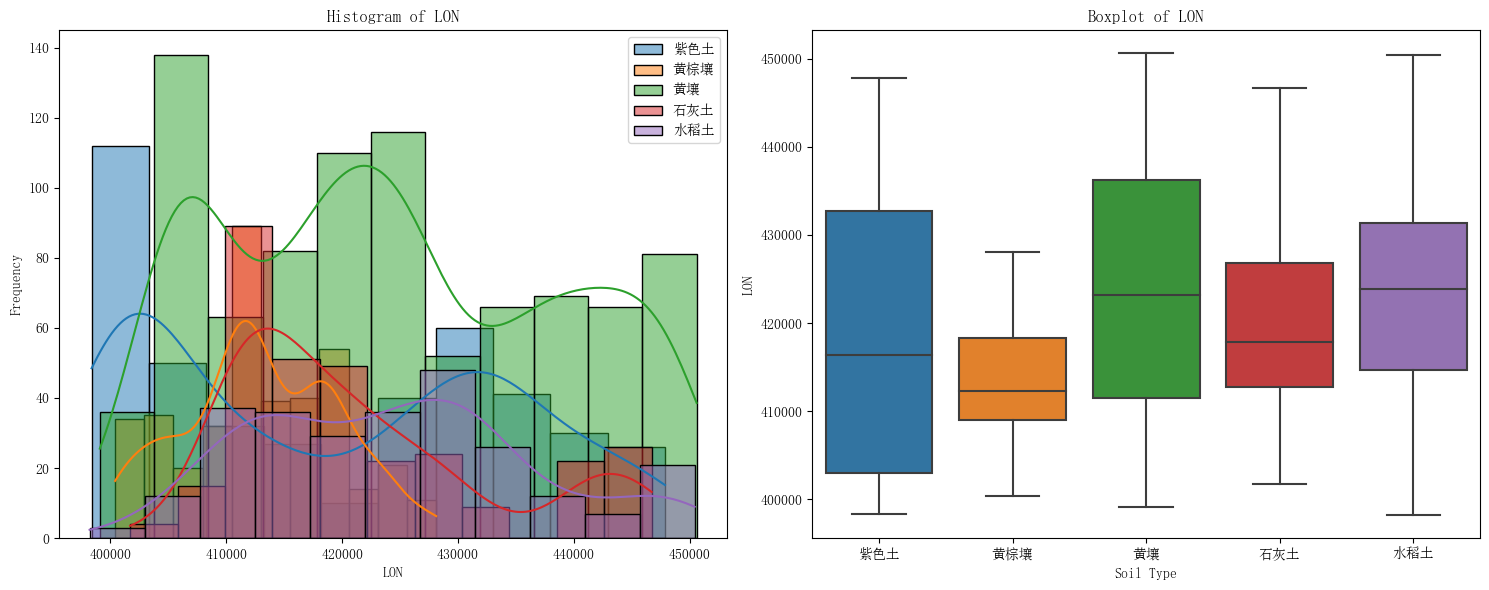

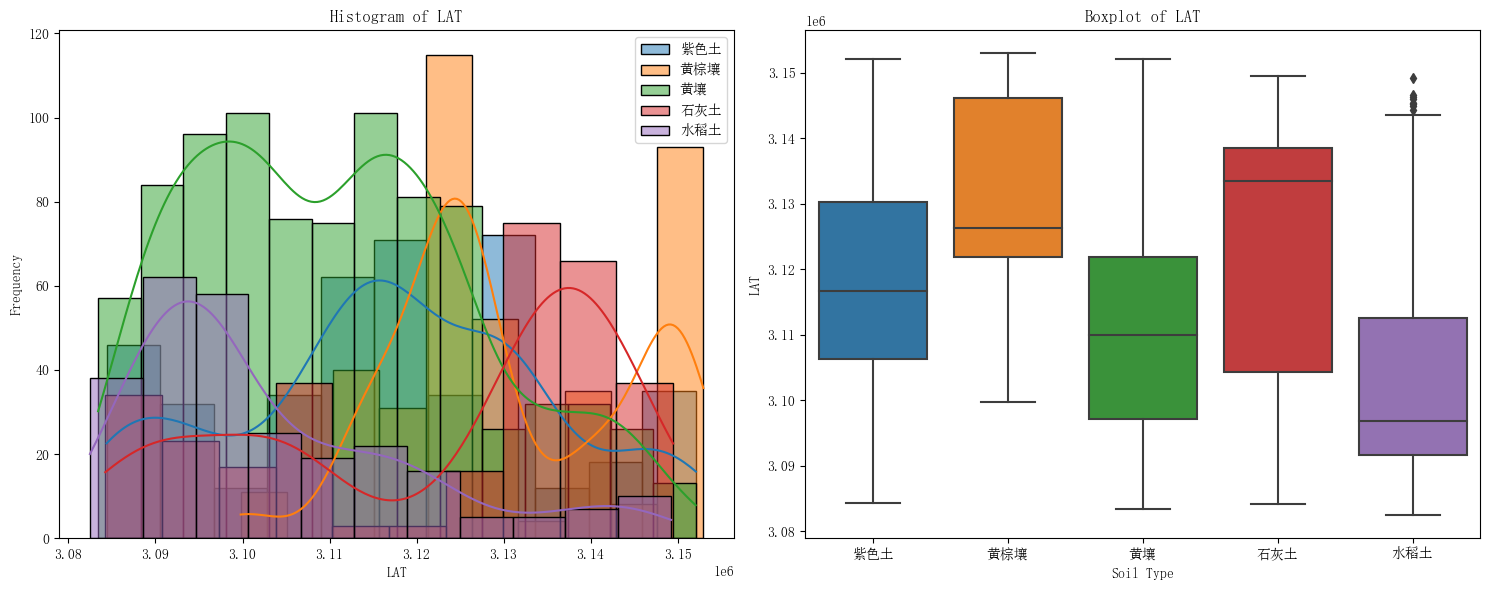

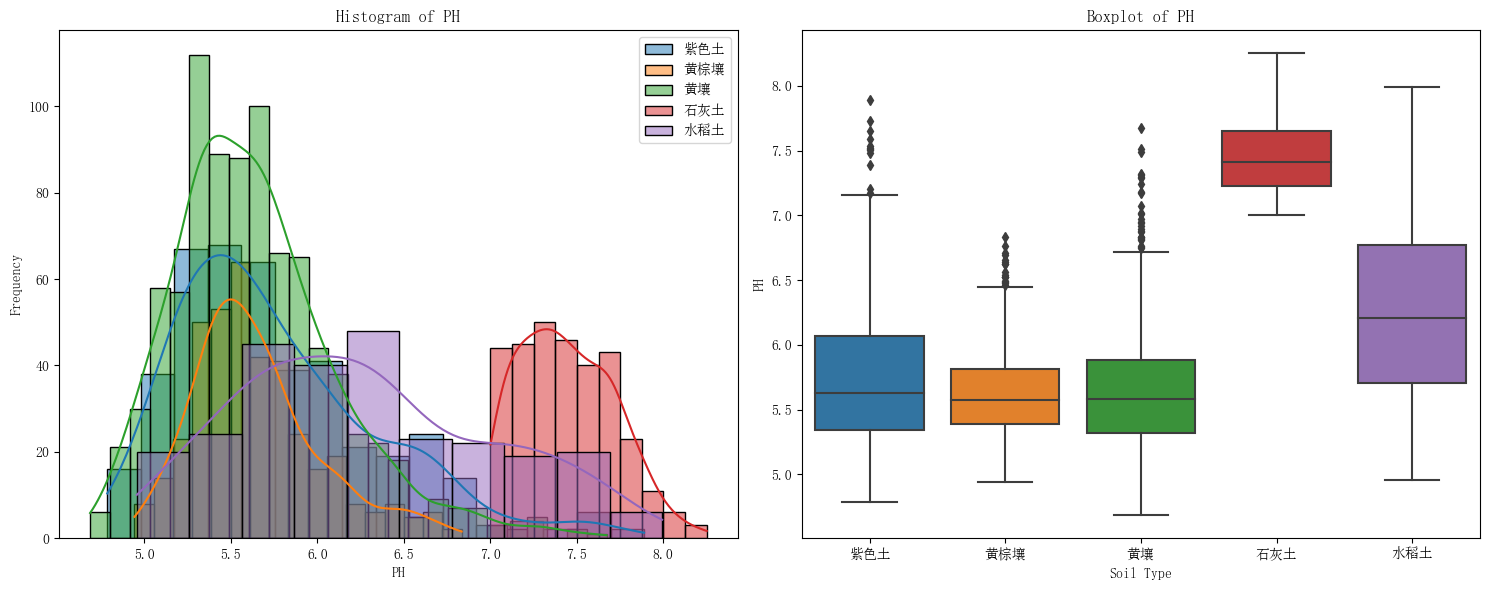

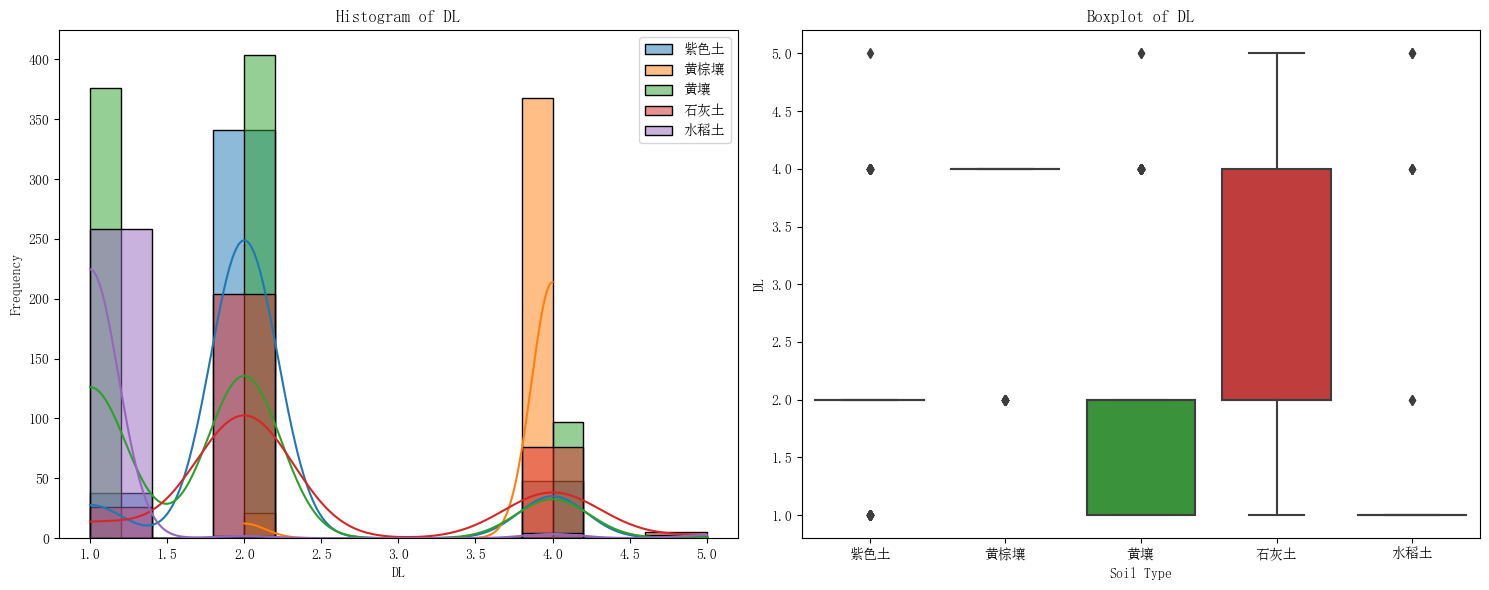

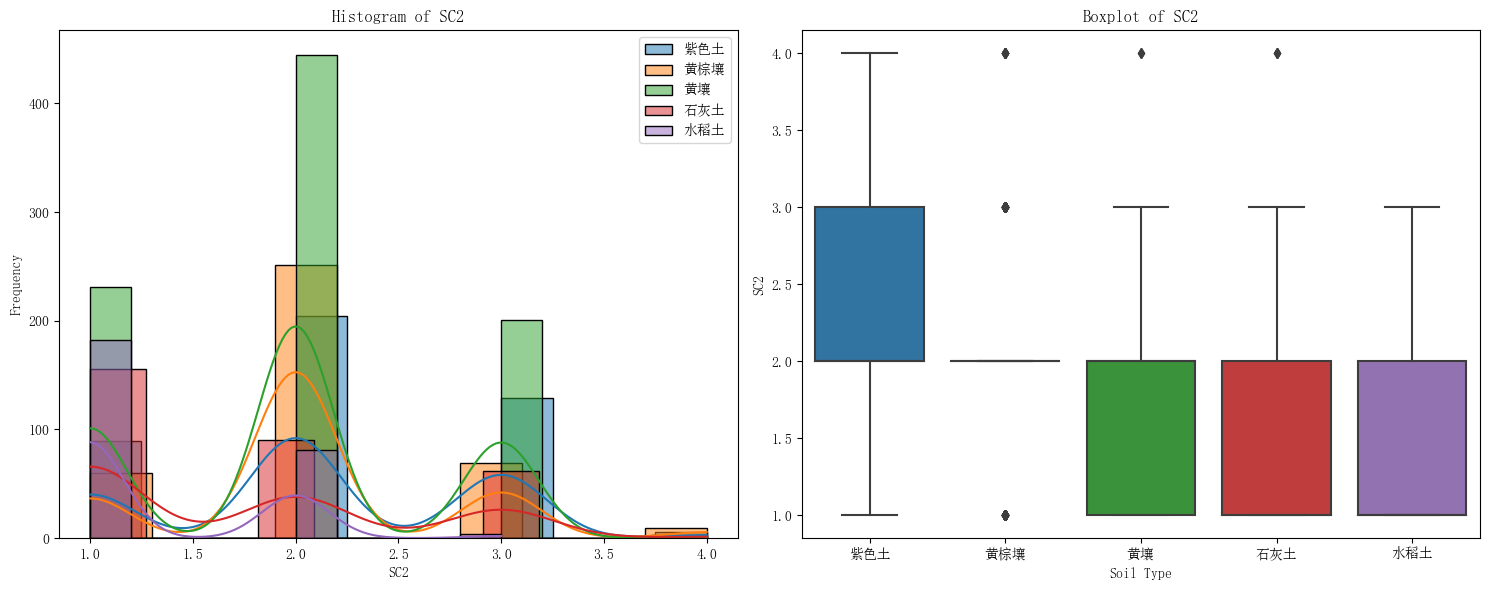

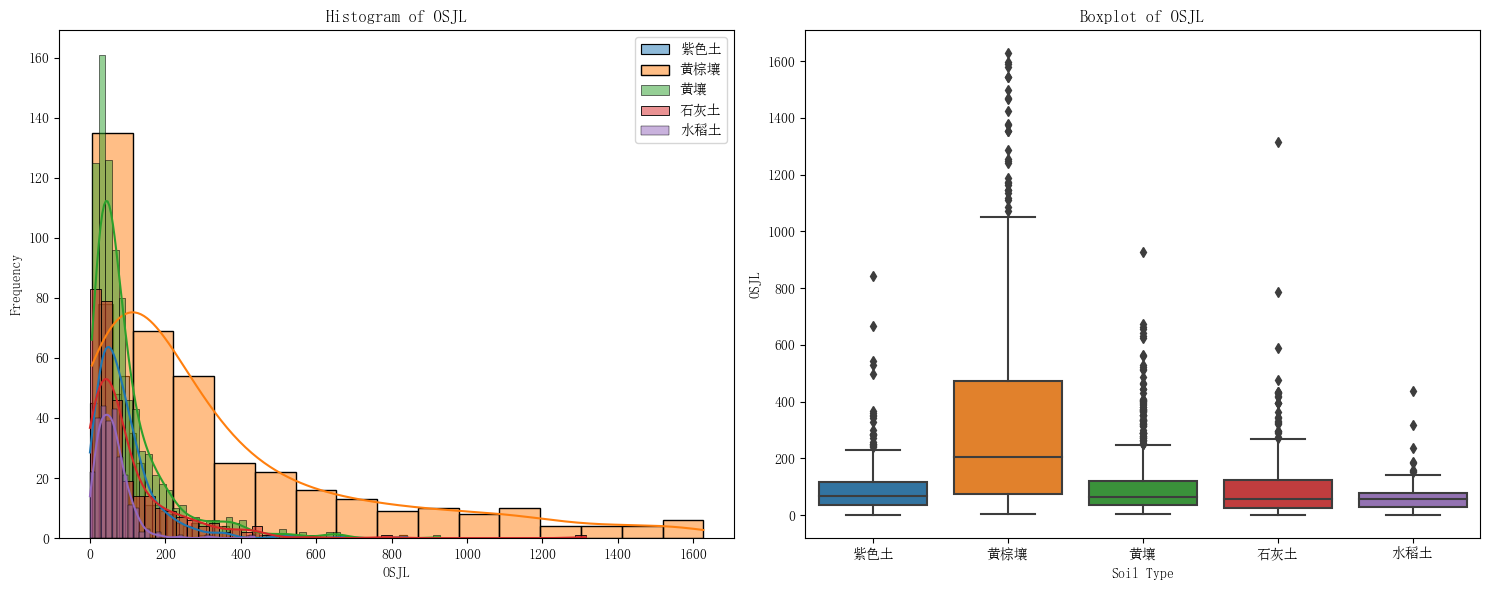

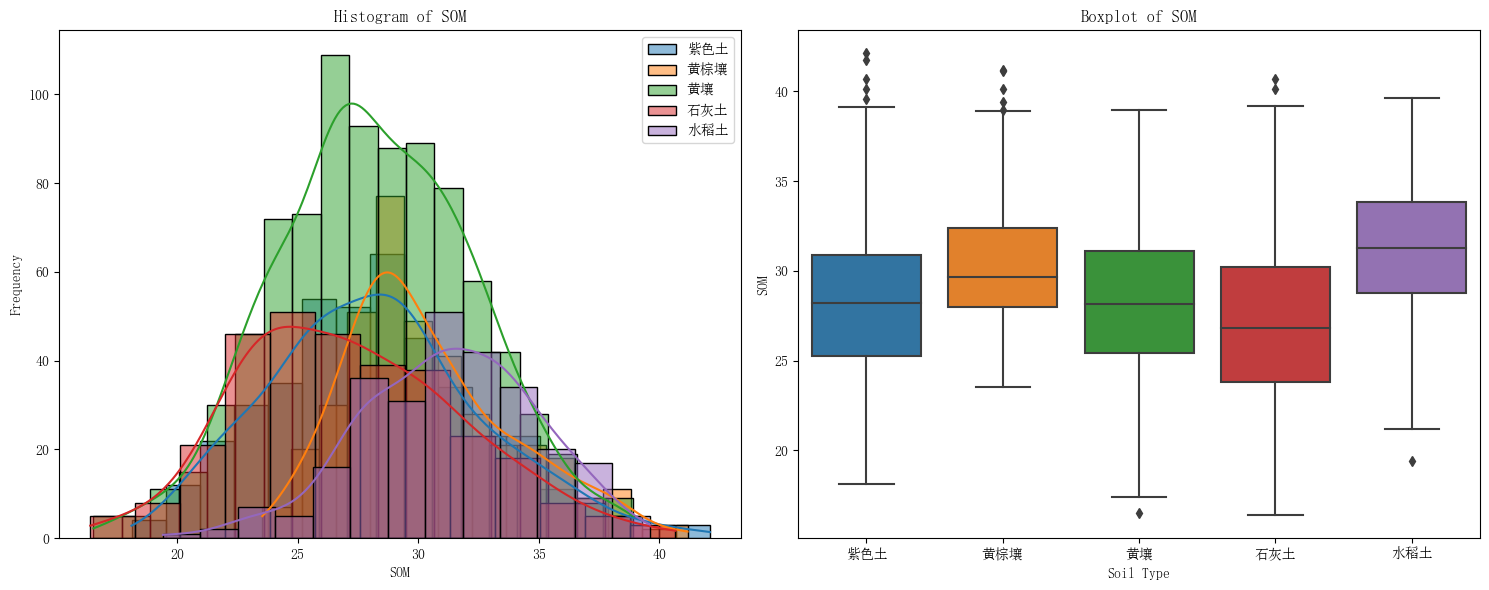

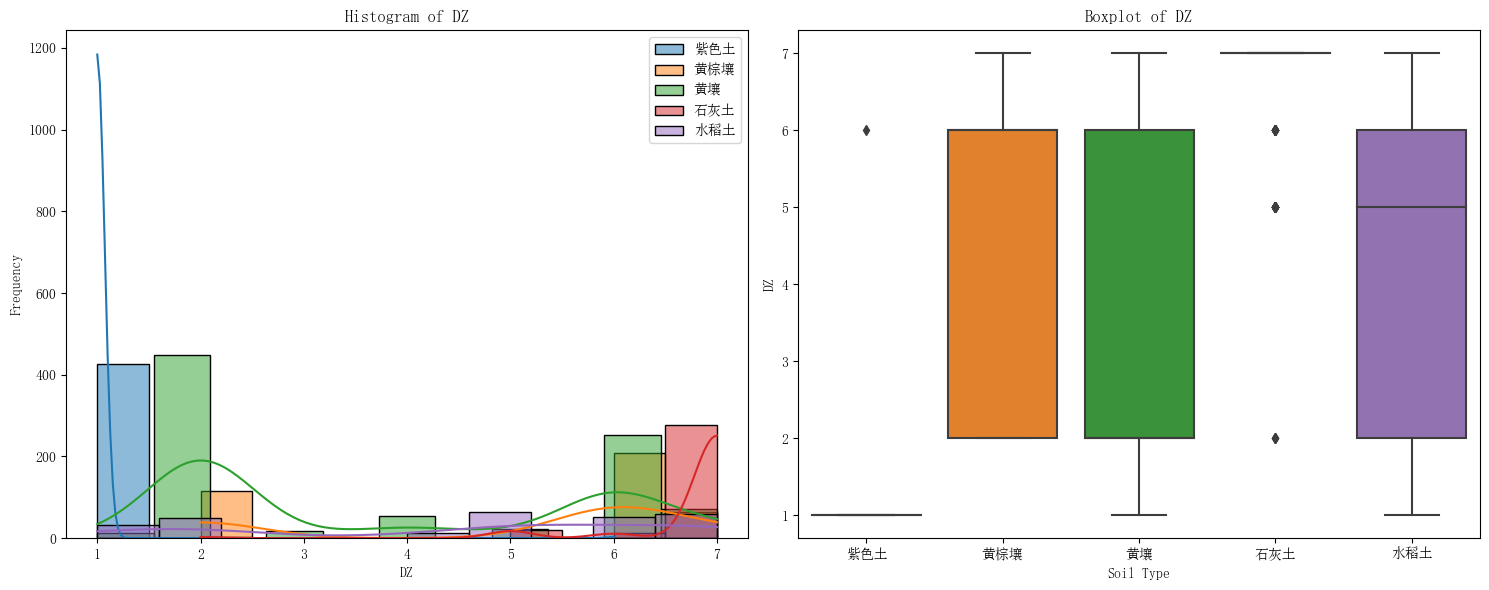

In [7]:
# Filter out the columns that are not needed for analysis
df_filtered = df.drop(['亚类', '土属', '土种'], axis=1)

# Identify the soil types (土类) and the environmental features
soil_types = df_filtered['土类'].unique()
env_features = df_filtered.columns.drop('土类')

# Function to plot histograms and boxplots for each feature across soil types
def plot_feature_distribution(feature, df_filtered, soil_types):
    plt.figure(figsize=(15, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    for soil_type in soil_types:
        sns.histplot(df_filtered[df_filtered['土类'] == soil_type][feature], label=soil_type, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='土类', y=feature, data=df_filtered)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('Soil Type')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

# Plotting the distribution for each environmental feature
for feature in env_features:
    plot_feature_distribution(feature, df_filtered, soil_types)